In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torchvision as tv

## https://pytorch.org/hub/

In [ ]:
tv.models.regnet_x_400mf()

RegNet(
  (stem): SimpleStemIN(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (trunk_output): Sequential(
    (block1): AnyStage(
      (block1-0): ResBottleneckBlock(
        (proj): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (f): BottleneckTransform(
          (a): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (b): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=2, bias=False)
            

In [ ]:
model = tv.models.regnet_x_400mf(weights = 'DEFAULT')

Downloading: "https://download.pytorch.org/models/regnet_x_400mf-62229a5f.pth" to /root/.cache/torch/hub/checkpoints/regnet_x_400mf-62229a5f.pth
100%|██████████| 21.3M/21.3M [00:00<00:00, 98.7MB/s]


In [ ]:
import torchsummary
torchsummary.summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              ReLU-3         [-1, 32, 112, 112]               0
            Conv2d-4           [-1, 32, 56, 56]           1,024
       BatchNorm2d-5           [-1, 32, 56, 56]              64
            Conv2d-6         [-1, 32, 112, 112]           1,024
       BatchNorm2d-7         [-1, 32, 112, 112]              64
              ReLU-8         [-1, 32, 112, 112]               0
            Conv2d-9           [-1, 32, 56, 56]           4,608
      BatchNorm2d-10           [-1, 32, 56, 56]              64
             ReLU-11           [-1, 32, 56, 56]               0
           Conv2d-12           [-1, 32, 56, 56]           1,024
      BatchNorm2d-13           [-1, 32, 56, 56]              64
             ReLU-14           [-1, 32,

In [ ]:
!pip install onnx
import torch.onnx

dummy_input = torch.randn(1, 3, 224, 224)
torch.onnx.export(model, dummy_input, "model.onnx")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 19.8 MB/s eta 0:00:00
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [ ]:
!wget https://img.hankyung.com/photo/202101/01.25062168.1.jpg -O test1.jpg

--2023-08-18 00:06:37--  https://img.hankyung.com/photo/202101/01.25062168.1.jpg
Resolving img.hankyung.com (img.hankyung.com)... 1.248.254.68
Connecting to img.hankyung.com (img.hankyung.com)|1.248.254.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94357 (92K) [image/jpeg]
Saving to: ‘test1.jpg’

test1.jpg           100%[===================>]  92.15K   275KB/s    in 0.3s    

2023-08-18 00:06:40 (275 KB/s) - ‘test1.jpg’ saved [94357/94357]



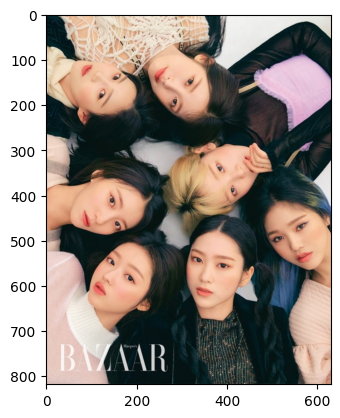

In [ ]:
from torchvision.io import read_image
img = read_image("test1.jpg")
plt.imshow(img.permute(1,2,0))

In [ ]:
!wget https://cdn.ngetnews.com/news/photo/202005/301734_12608_1735.jpg  -O test.jpg

--2023-08-18 00:06:40--  https://cdn.ngetnews.com/news/photo/202005/301734_12608_1735.jpg
Resolving cdn.ngetnews.com (cdn.ngetnews.com)... 1.224.180.182
Connecting to cdn.ngetnews.com (cdn.ngetnews.com)|1.224.180.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79617 (78K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  77.75K   117KB/s    in 0.7s    

2023-08-18 00:06:42 (117 KB/s) - ‘test.jpg’ saved [79617/79617]



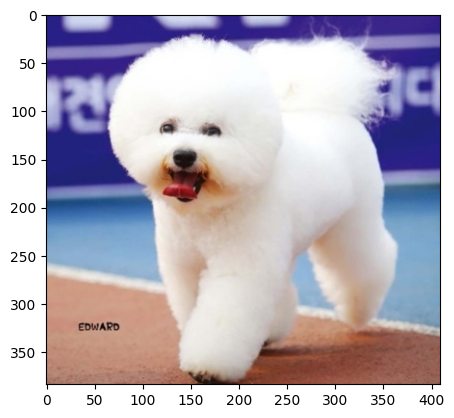

In [ ]:
from torchvision.io import read_image
img = read_image("test.jpg")
plt.imshow(img.permute(1,2,0)) # RGB -----> GBR

In [ ]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights

img = read_image("test.jpg")

# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 228MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
preprocess = weights.transforms()
preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

## input size 조정

In [ ]:
img.shape #torch.Size([3, 384, 409]) CHW 형태

torch.Size([3, 384, 409])

In [ ]:
image = cv2.imread('test.jpg') #HWC, BGR, uint8(0-255)
image = torch.tensor(image)
image = image[..., [2, 1, 0]] #BGR->RGB 로 C 를 변환
image = image.permute(2, 0, 1) #HWC -> CHW

#제공해주는 함수를 사용
batch = preprocess(image) #resize, scale

#직접 하려고 하면..
image = cv2.imread('test.jpg') #HWC, BGR, uint8(0-255)
image = cv2.resize(image, (224, 224))
image = torch.tensor(image)
image = image[..., [2, 1, 0]] #BGR->RGB
image = (image/255 - torch.tensor([0.485, 0.456, 0.406])) / torch.tensor([0.229, 0.224, 0.225])
image = image.permute(2, 0, 1) #HWC -> CHW
image.max()

batch = image[None]
logit = model(batch)
prob =logit.squeeze(0).softmax(0)
class_id = prob.argmax().item()
score  = prob[class_id].item
weights.meta['categories'][class_id], class_id

('Maltese dog', 153)

In [ ]:
from torchvision.models.regnet import SimpleStemIN
model.stem = SimpleStemIN

#모델 생성....그리고 전처리 함수까지

In [ ]:
weights = tv.models.RegNet_X_400MF_Weights.DEFAULT
model = tv.models.regnet_x_400mf(weights = weights)
preprocess = weights.transforms()

model.fc = nn.Linear(400, 4) #마지막 층 레이어
dummy = torch.randn(32, 3, 224, 224) #ImageClassification(crop_size=[224] resize_size=[232])
model(dummy).shape

Downloading: "https://download.pytorch.org/models/regnet_x_400mf-62229a5f.pth" to /root/.cache/torch/hub/checkpoints/regnet_x_400mf-62229a5f.pth
100%|██████████| 21.3M/21.3M [00:00<00:00, 117MB/s] 


torch.Size([32, 4])

In [ ]:
preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip

--2023-08-18 02:38:10--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 3.5.72.136, 52.218.80.139, 52.218.61.152, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|3.5.72.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95592747 (91M) [application/octet-stream]
Saving to: ‘4drtyfjtfy-1.zip’

4drtyfjtfy-1.zip    100%[===================>]  91.16M  21.2MB/s    in 4.5s    

2023-08-18 02:38:15 (20.2 MB/s) - ‘4drtyfjtfy-1.zip’ saved [95592747/95592747]



In [ ]:
!unzip -qq 4drtyfjtfy-1.zip
!unzip -qq dataset2.zip

In [ ]:
for i in range(10): # for ~~~else 문은 다중 if 문을 단순하게 하는 방법
  if i ==5:
    break
else:
  print('???')

In [ ]:
# !rm -rf train
# !rm -rf valid

In [ ]:
import os
import random
os.makedirs('weather/train', exist_ok = True)
os.makedirs('weather/valid', exist_ok = True)
for root, dirs, filenames in os.walk('dataset2'):
  for filename in filenames:
    path = os.path.join(root, filename)
    image = cv2.imread(path)
    if image is None:
      print('error', path)
      continue
    if image.shape[1] > 1000:
      h = image.shape[0] / image.shape[1]*1000
      image = cv2.resize(image, (1000, int(h)))
    if random.random() < 0.9:
      dst_path = 'weather/train/'+ filename
    else:
      dst_path = 'weather/valid/' + filename

    cv2.imwrite(dst_path, image)
    #print(dst_path)





error dataset2/rain141.jpg
error dataset2/shine131.jpg


In [ ]:
!tar -cf weather.tar weather # 압축해서 저장

In [ ]:
!mv weather.tar drive/MyDrive/datasets/ #구글드라이브로 저장

In [ ]:
!tar -xf drive/MyDrive/datasets/weather.tar -C . # 구글 드라이브에서 불러오기

##dataset 생성

In [ ]:
import os
import random

dataset_train = []
dataset_valid = []
labels = ['cloudy', 'rain', 'shine', 'sunrise']
for root, dirs, filenames in os.walk('weather'):
  if 'train' in root:
    dataset = dataset_train
  elif 'valid' in root:
    dataset = dataset_valid
  else:
    continue

  for filename in filenames:
    for i, label in enumerate(labels):
      if label in filename:
        cat = i
        break
    else:
      continue
    if cat ==-1:
      continue
    path = os.path.join(root, filename)
    dataset.append((path, cat))

len(dataset_train), len(dataset_valid)

(1027, 96)

##dataloader 생성

In [ ]:
#path = '/content/weather/train/cloudy105.jpg'
import torchvision.transforms as tr
trans_train = tr.Compose([
    tr.Resize((224 + 150, 224 + 150)),
    tr.RandomHorizontalFlip(),
    tr.RandomPerspective(distortion_scale=0.3, p=1.0),
    tr.RandomResizedCrop(size=(224, 224)) # 데이터 증강
])

trans_valid = tr.Compose([
    tr.Resize((224, 224)),
])

def image_loader_train(path):
  image = tv.io.read_image(path) # 3 H, W
  image = preprocess(image) # 3, 224, 224 (scaled)
  return image

def image_loader_valid(path):
  image = tv.io.read_image(path) # 3 H, W
  image = preprocess(image) # 3, 224, 224 (scaled)
  return image


In [ ]:
def collate_fn_train(data):
  x_list = []
  y_list = []
  for x, y in data:
    x = image_loader(x)
    x_list.append(x)
    y = torch.tensor(y)
    y_list.append(y)
  x_res = torch.stack(x_list)
  y_res = torch.stack(y_list)
  return x_res, y_res

def collate_fn_valid(data):
  x_list = []
  y_list = []
  for x, y in data:
    x = image_loader(x)
    x_list.append(x)
    y = torch.tensor(y)
    y_list.append(y)
  x_res = torch.stack(x_list)
  y_res = torch.stack(y_list)
  return x_res, y_res

loader_train = torch.utils.data.DataLoader(dataset_train, collate_fn = collate_fn_train,
                                           batch_size = 32, shuffle =True, drop_last = True, num_workers = 2)
loader_valid = torch.utils.data.DataLoader(dataset_valid, collate_fn = collate_fn_valid,
                                           batch_size = 32, shuffle =True, drop_last = True, num_workers = 2)

In [ ]:
for x, y in loader_train:
  break

x.shape, y.shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

## 학습

In [ ]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [ ]:
model.to(device)
model = model.requires_grad_(False) # 기존 모델의 파라미터는 학습 하지 못하게
model.fc.requires_grad_(True) # 마지막 층만 학습
opt = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.CrossEntropyLoss(label_smoothing = 0.3) #(label_smoothing = 0.3)이 overfitting 막아줌


In [ ]:
import warnings

warnings.filterwarnings("ignore") #학습시 warnings 제거하는 방법

In [ ]:
for epoch in range(20):
    model.train()
    step = 1
    loss_list = []
    acc_list = []
    for x, y in loader_train:
        logit = model(x.to(device))
        loss = loss_fn(logit, y.to(device))
        opt.zero_grad()
        loss.backward()
        opt.step()

        #....
        loss_list.append(loss.item()) #to cpu, detach, float
        pred = logit.argmax(dim=1).to('cpu')
        acc = (pred == y).float().mean()
        acc_list.append(acc.item())

        print(f'\r epoch={epoch}  step={step}  loss={np.mean(loss_list):.4f}  acc={np.mean(acc_list):.4f}', end='')
        step += 1
    print()

    model.eval()
    step = 1
    loss_list = []
    acc_list = []
    for x, y in loader_valid:
        logit = model(x.to(device))
        loss = loss_fn(logit, y.to(device))

        #....
        loss_list.append(loss.item()) #to cpu, detach, float
        pred = logit.argmax(dim=1).to('cpu')
        acc = (pred == y).float().mean()
        acc_list.append(acc.item())

        print(f'\r {" " * 50} step={step}  loss={np.mean(loss_list):.4f}  acc={np.mean(acc_list):.4f}', end='')
        step += 1
    print()

 epoch=0  step=32  loss=0.8795  acc=0.9561
                                                    step=3  loss=0.8902  acc=1.0000
 epoch=1  step=32  loss=0.8793  acc=0.9639
                                                    step=3  loss=0.9017  acc=0.9479
 epoch=2  step=32  loss=0.8699  acc=0.9688
                                                    step=3  loss=0.8846  acc=0.9896
 epoch=3  step=32  loss=0.8663  acc=0.9785
                                                    step=3  loss=0.8963  acc=0.9792
 epoch=4  step=32  loss=0.8724  acc=0.9668
                                                    step=3  loss=0.8944  acc=0.9688
 epoch=5  step=32  loss=0.8703  acc=0.9697
                                                    step=3  loss=0.8908  acc=0.9792
 epoch=6  step=32  loss=0.8708  acc=0.9678
                                                    step=3  loss=0.8917  acc=0.9792
 epoch=7  step=32  loss=0.8720  acc=0.9658
                                                    step=3  loss=0.8

In [ ]:
image  = cv2.imread('/content/weather/valid/cloudy166.jpg')
image = cv2.resize(image, (224, 224))
image = image[..., [2, 1, 0]]
image = (image/255 - [ 0.485, 0.456, 0.406]) / [ 0.229, 0.224, 0.225]
image = image.transpose(2, 0, 1)
input = torch.tensor(image, dtype = torch.float32).unsqueeze(0)
model.eval()
with torch.no_grad():
  logit = model(input.to(device))
cat = logit.argmax(dim = 1).item()
cat


3